📁 Please upload your cleaned dataset (heart_cleaned.csv)...


Saving heart_cleaned.csv to heart_cleaned.csv
✅ Dataset Loaded Successfully!
Shape: (302, 14)

📈 Model Evaluation Results:
                     Precision   Recall  F1-Score
Logistic Regression   0.848485  0.87500  0.861538
Random Forest         0.900000  0.84375  0.870968


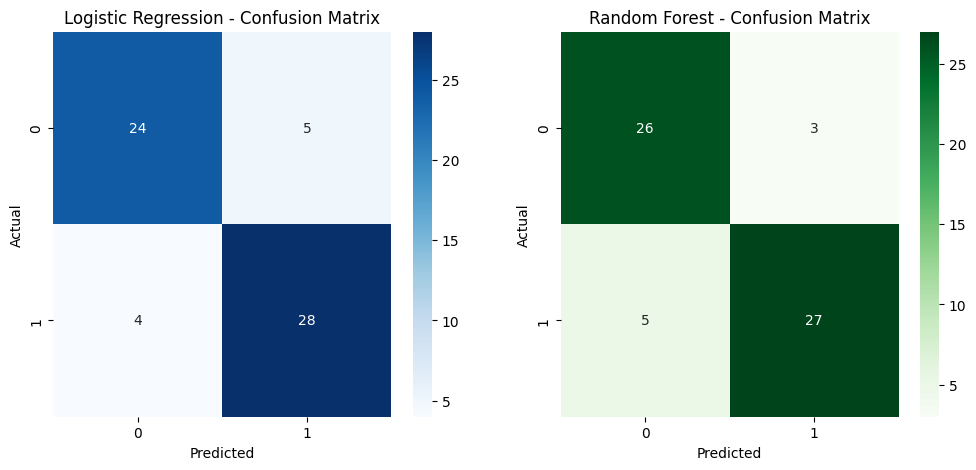

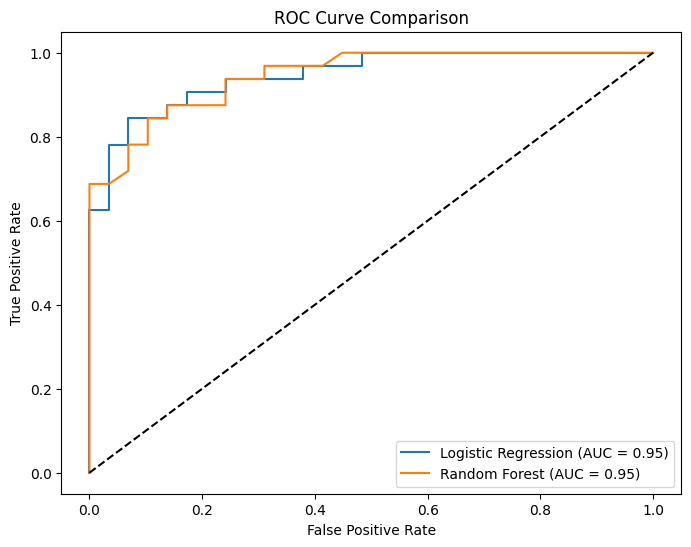


✅ Evaluation Summary:
                     Precision   Recall  F1-Score
Logistic Regression   0.848485  0.87500  0.861538
Random Forest         0.900000  0.84375  0.870968

🏆 Best Performing Model: Random Forest

📘 Milestone: Model evaluation complete — metrics and ROC curve analyzed.


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    confusion_matrix,
    classification_report,
    roc_curve,
    roc_auc_score,
    precision_score,
    recall_score,
    f1_score,
)
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files
print("📁 Please upload your cleaned dataset (heart_cleaned.csv)...")
uploaded = files.upload()
df = pd.read_csv("heart_cleaned.csv")
print("✅ Dataset Loaded Successfully!")
print("Shape:", df.shape)
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)
y_prob_log = log_model.predict_proba(X_test)[:, 1]
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]
def evaluate_model(name, y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    return pd.Series(
        [precision, recall, f1],
        index=["Precision", "Recall", "F1-Score"],
        name=name
    )
results = pd.concat([
    evaluate_model("Logistic Regression", y_test, y_pred_log),
    evaluate_model("Random Forest", y_test, y_pred_rf)
], axis=1)

print("\n📈 Model Evaluation Results:")
print(results.T)
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
sns.heatmap(confusion_matrix(y_test, y_pred_log), annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title("Logistic Regression - Confusion Matrix")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens', ax=axes[1])
axes[1].set_title("Random Forest - Confusion Matrix")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("Actual")
plt.show()
fpr_log, tpr_log, _ = roc_curve(y_test, y_prob_log)
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f"Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_log):.2f})")
plt.plot(fpr_rf, tpr_rf, label=f"Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison")
plt.legend()
plt.show()
print("\n✅ Evaluation Summary:")
print(results.T)
best_model = "Random Forest" if results.loc["F1-Score", "Random Forest"] > results.loc["F1-Score", "Logistic Regression"] else "Logistic Regression"
print(f"\n🏆 Best Performing Model: {best_model}")
print("\n📘 Milestone: Model evaluation complete — metrics and ROC curve analyzed.")
